Experiment 1: Implementation of a single artificial neuron.
o	Write a program to simulate a single artificial neuron performing binary classification.
o	Inputs, weights, bias, and activation function.


Experiment 2: Implementation of Single Layer Perceptron (SLP).
o	Train and test SLP on a linearly separable dataset (e.g., AND/OR gate).

In [ ]:
import numpy as np


inputs = np.array([1, 0])
weights = np.array([0.8, -0.5])
bias = 0.2

# Activation function (Sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


z = np.dot(inputs, weights) + bias
output = sigmoid(z)

print(f"Output: {output}")


** (AND gate)**

In [ ]:
import numpy as np

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return step_function(summation)

    def train(self, inputs, labels, epochs=100):
        for _ in range(epochs):
            for input_vector, label in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * input_vector
                self.bias += self.learning_rate * error

# Sample data for binary classification (AND gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # AND gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


** (OR gate)**


In [ ]:
# Sample data for binary classification (OR gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # OR gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


In [ ]:
# Load the Titanic dataset
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())  # Display the first 5 rows of the dataset
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Preprocessing: Keep relevant columns and create a copy
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step activation function
def step_function(z):
    return np.where(z > 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error_count = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                prediction = step_function(z)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    error_count += 1
            self.errors.append(error_count)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return step_function(z)

# Initialize and train the perceptron
model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred_manual = model.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_manual))


Perceptron Accuracy: 0.7877094972067039


In [ ]:

data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()


data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)


from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score
y_pred_sklearn = clf.predict(X_test)
print("Scikit-Learn Perceptron Accuracy:", accuracy_score(y_test, y_pred_sklearn))


Scikit-Learn Perceptron Accuracy: 0.6536312849162011


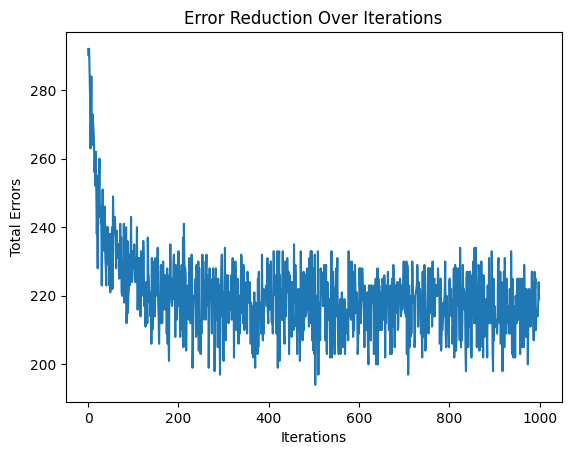

In [ ]:


plt.plot(range(len(model.errors)), model.errors)
plt.xlabel("Iterations")
plt.ylabel("Total Errors")
plt.title("Error Reduction Over Iterations")
plt.show()

Experiment 3: Multi-Layer Perceptron (MLP) for XOR Gate. Design and train MLP to solve the XOR problem.


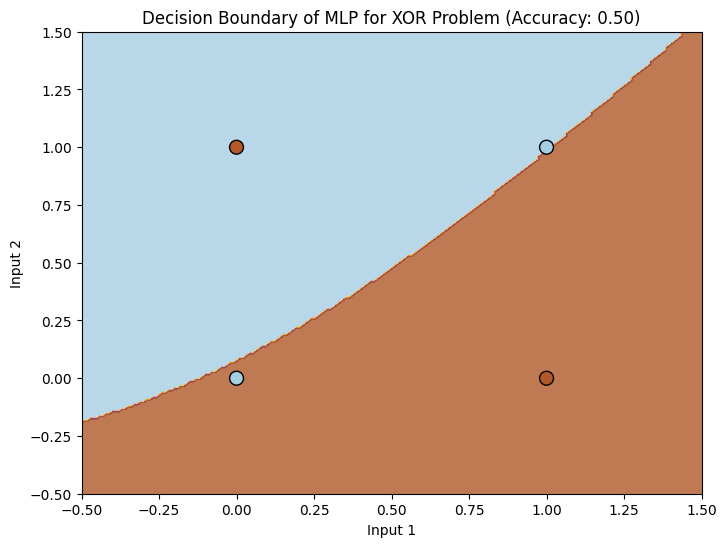

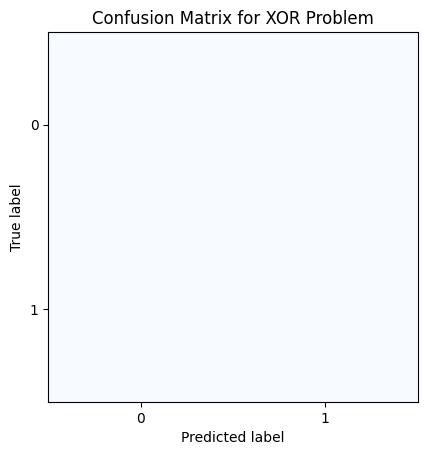

0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000, random_state=42)
mlp.fit(X, y)


y_pred = mlp.predict(X)
accuracy = accuracy_score(y, y_pred)


xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=100, cmap=plt.cm.Paired)
plt.title(f"Decision Boundary of MLP for XOR Problem (Accuracy: {accuracy:.2f})")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


ConfusionMatrixDisplay.from_estimator(mlp, X, y, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix for XOR Problem")
plt.show()

accuracy


Experiment 4: Activation Functions. Implement Sigmoid, ReLU, and Tanh activation functions. Compare their outputs on a dataset.


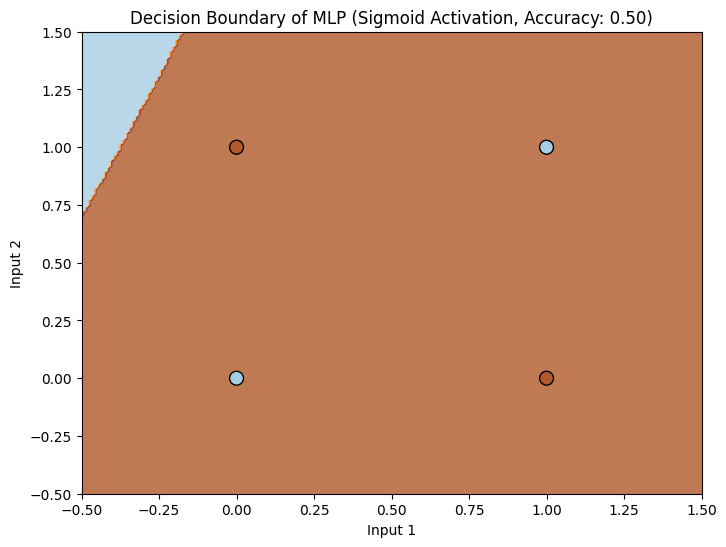

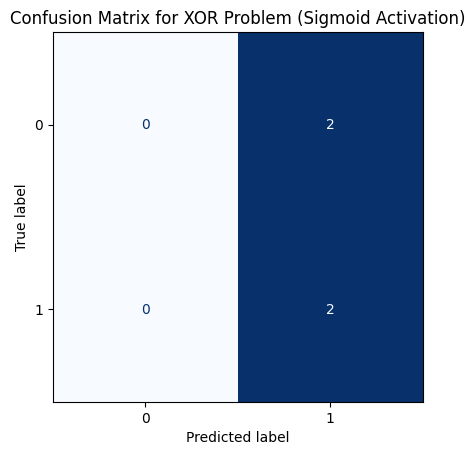

0.5

In [3]:

mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)
mlp_sigmoid.fit(X, y)


y_pred_sigmoid = mlp_sigmoid.predict(X)
accuracy_sigmoid = accuracy_score(y, y_pred_sigmoid)


Z_sigmoid = mlp_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_sigmoid, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=100, cmap=plt.cm.Paired)
plt.title(f"Decision Boundary of MLP (Sigmoid Activation, Accuracy: {accuracy_sigmoid:.2f})")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


ConfusionMatrixDisplay.from_estimator(mlp_sigmoid, X, y, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix for XOR Problem (Sigmoid Activation)")
plt.show()

accuracy_sigmoid


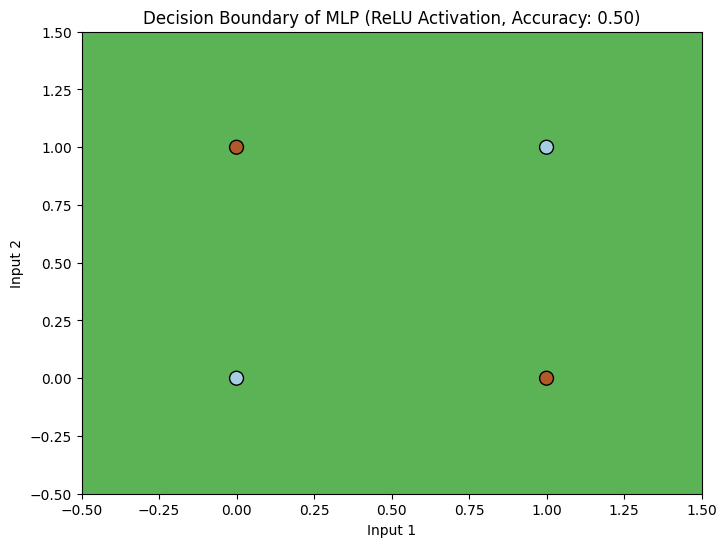

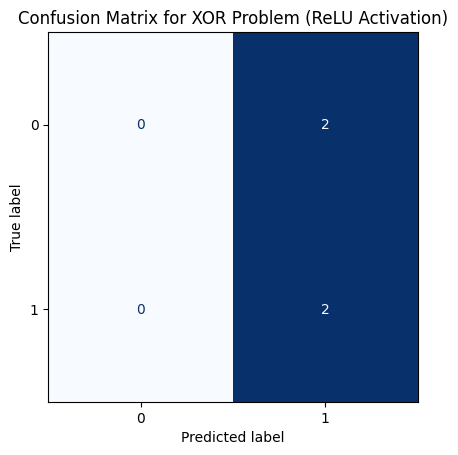

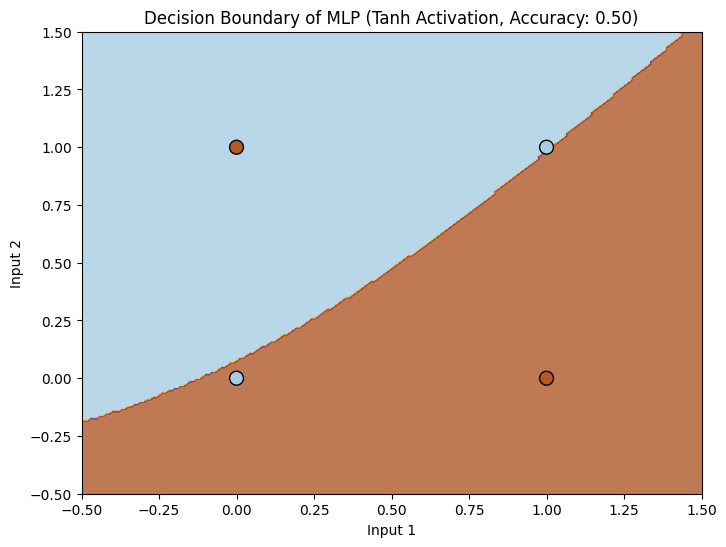

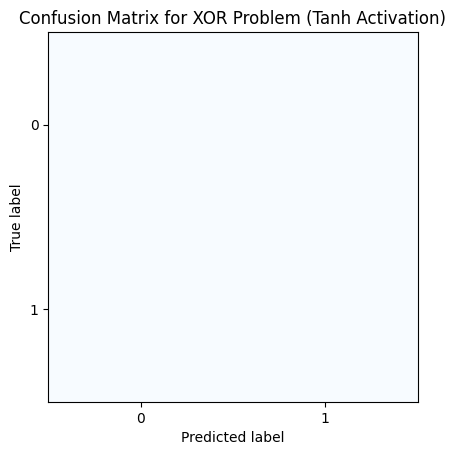

(0.5, 0.5)

In [2]:

mlp_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000, random_state=42)
mlp_relu.fit(X, y)

y_pred_relu = mlp_relu.predict(X)
accuracy_relu = accuracy_score(y, y_pred_relu)


Z_relu = mlp_relu.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_relu, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=100, cmap=plt.cm.Paired)
plt.title(f"Decision Boundary of MLP (ReLU Activation, Accuracy: {accuracy_relu:.2f})")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()

ConfusionMatrixDisplay.from_estimator(mlp_relu, X, y, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix for XOR Problem (ReLU Activation)")
plt.show()


mlp_tanh = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000, random_state=42)
mlp_tanh.fit(X, y)


y_pred_tanh = mlp_tanh.predict(X)
accuracy_tanh = accuracy_score(y, y_pred_tanh)


Z_tanh = mlp_tanh.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_tanh, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=100, cmap=plt.cm.Paired)
plt.title(f"Decision Boundary of MLP (Tanh Activation, Accuracy: {accuracy_tanh:.2f})")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


ConfusionMatrixDisplay.from_estimator(mlp_tanh, X, y, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix for XOR Problem (Tanh Activation)")
plt.show()

accuracy_relu, accuracy_tanh


Experiment 5: Forward and Backpropagation. Implement forward propagation and backpropagation manually for a 2-layer neural network.


In [4]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

np.random.seed(42)
input_size = 2
hidden_size = 2
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

learning_rate = 0.1
epochs = 10000
for epoch in range(epochs):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    loss = np.mean((y - A2) ** 2)

    dA2 = -(y - A2)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)

print("\nFinal Outputs:")
print(A2)


Epoch 0, Loss: 0.2943508288500037
Epoch 1000, Loss: 0.24440977094692865
Epoch 2000, Loss: 0.2035390981781202
Epoch 3000, Loss: 0.1533485406663887
Epoch 4000, Loss: 0.04633103600452315
Epoch 5000, Loss: 0.015614674284243894
Epoch 6000, Loss: 0.008448376076782192
Epoch 7000, Loss: 0.00561351355775748
Epoch 8000, Loss: 0.004146485528192299
Epoch 9000, Loss: 0.0032635336784319594

Final Outputs:
[[0.05395132]
 [0.9505447 ]
 [0.95009809]
 [0.05355567]]
